In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib_inline
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
# Creating list to append tweet data to
tweets_list_datascience = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweeti in enumerate(sntwitter.TwitterSearchScraper('data science AND programming since:2012-01-01 until:2022-01-01').get_items()):
    tweets_list_datascience.append([tweeti.date, tweeti.id, tweeti.content, tweeti.user.username])
    
# Creating a dataframe from the tweets list above
tweets_df_datascience = pd.DataFrame(tweets_list_datascience, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [5]:
tweets_df_datascience.to_csv('datascience.csv')

In [3]:
tweets_df_datascience.sort_values(by='Datetime')

,Datetime,Tweet Id,Text,Username
44797,2012-01-11 08:36:48+00:00,157018106626191360,"Computer science , programming not opening up ...",KlingKlang1968
44796,2012-01-14 02:43:55+00:00,158016462898991104,Dr. Bunsen Blog - Home - 6 Great Textbooks in ...,AnthonyNystrom
44795,2012-01-22 18:21:40+00:00,161151559038799872,R Programming for Bioinformatics (Chapman 038 ...,3kathatk
44794,2012-01-26 00:37:04+00:00,162333197659684865,"Created music in Computer Science tonight, Pur...",DasKota
44793,2012-01-30 11:56:35+00:00,163953753211420672,R Programming for Bioinformatics (Chapman 038 ...,nhimaitf
...,...,...,...,...
4,2021-12-31 20:34:03+00:00,1477015216433029126,PYTHON: Learn Coding Programs with Python Prog...,pythonbot_
3,2021-12-31 23:04:56+00:00,1477053184367640578,In all jobs that do some form of scientific co...,chocogammamon
2,2021-12-31 23:11:04+00:00,1477054727921672192,RT 6 Helpful Tips for Acing Your Data Science ...,DrMattCrowson
1,2021-12-31 23:18:46+00:00,1477056665988079625,6 Helpful Tips for Acing Your Data Science Int...,labvault


<AxesSubplot:>

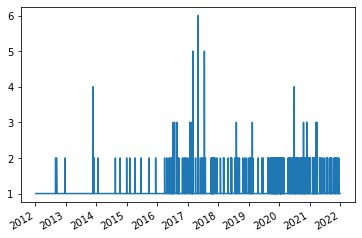

In [4]:
%matplotlib inline

tweets_df_datascience['Datetime'].value_counts().plot()